## Make new Product Recommendations¶

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import time
from sklearn.externals import joblib

### 1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [2]:
product_df = pd.read_csv("ratings_Electronics.csv")
product_df.columns = ['userId', 'productId', 'ratings','timestamp']
product_df.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
len(product_df)

7824481

There are 7824481 user - product details

In [4]:
#dropping timestamp column
product_df.drop('timestamp',axis=1,inplace=True)

In [5]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


### 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [6]:
user_grouped = product_df.groupby(['userId']).agg({'ratings': 'count'}).reset_index()
grp_df = user_grouped.sort_values(['ratings'], ascending = [0])
filtered_Users = grp_df[grp_df['ratings']>=50]

In [7]:
filtered_Users.head()

,userId,ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406


In [8]:
user_50 = list(filtered_Users['userId'])

In [9]:
filtered_Users.shape

(1540, 2)

In [10]:
len(user_50)

1540

In [11]:
sample_df = product_df[product_df['userId'].isin(filtered_Users['userId'])]

In [12]:
sample_df.shape

(125871, 3)

In [13]:
len(sample_df['userId'].unique())

1540

### 3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [14]:
train_data, test_data = train_test_split(sample_df, test_size = 0.20, random_state=0)

### 4. Build Popularity Recommender model.

In [15]:
import Helper as Helper

In [16]:
pm = Helper.popularity_recommender_py()

In [17]:
pm.create(train_data, 'userId', 'productId')

In [18]:
users = sample_df['userId'].unique()

In [19]:
user_id = users[5]
pm.recommend(user_id)

,user_id,productId,score,Rank
33726,A3TAS1AG6FMBQW,B0088CJT4U,160,1.0
21503,A3TAS1AG6FMBQW,B003ES5ZUU,146,2.0
33101,A3TAS1AG6FMBQW,B007WTAJTO,134,3.0
9568,A3TAS1AG6FMBQW,B000N99BBC,128,4.0
33402,A3TAS1AG6FMBQW,B00829TIEK,118,5.0
34011,A3TAS1AG6FMBQW,B008DWCRQW,113,6.0
33398,A3TAS1AG6FMBQW,B00829THK0,104,7.0
19040,A3TAS1AG6FMBQW,B002R5AM7C,103,8.0
19238,A3TAS1AG6FMBQW,B002SZEOLG,95,9.0
24884,A3TAS1AG6FMBQW,B004CLYEDC,95,10.0


For Popularity based we need not provide UserID as its is same for all users

### 5. Build Collaborative Filtering model.

In [20]:
is_model = Helper.item_similarity_recommender_py()

In [21]:
is_model.create(train_data, 'userId', 'productId')

In [22]:
user_data = train_data[train_data['userId'] == users[5]]
user_data.head()

,userId,productId,ratings
2782420,A3TAS1AG6FMBQW,B002QC17VG,5.0
7426090,A3TAS1AG6FMBQW,B00DQZQPNM,4.0
7523405,A3TAS1AG6FMBQW,B00ECGX9NS,2.0
2842002,A3TAS1AG6FMBQW,B002SZEOLG,5.0
5708330,A3TAS1AG6FMBQW,B007BYLKFW,5.0


In [23]:
user_items = list(user_data['productId'].unique())
user_items

['B002QC17VG',
 'B00DQZQPNM',
 'B00ECGX9NS',
 'B002SZEOLG',
 'B007BYLKFW',
 'B008U25LI6',
 'B00JEVI0US',
 'B00CF5OHZ2',
 'B00406YHLI',
 'B00EQD5ZS4',
 'B000ID7QNI',
 'B0080EBMM8',
 'B00B9KOCYA',
 'B00E2URJT4',
 'B004NEULF8',
 'B004P7GAPI',
 'B003G2Z1M6',
 'B001KELVS0',
 'B00426C57O',
 'B000S5Q9CA',
 'B009D79VH4',
 'B00D4MFPLA',
 'B004T9RR0E',
 'B000HPV3RW',
 'B00APUQPHW',
 'B001F7HLRC',
 'B00EVNVRM2',
 'B0067WUVF4',
 'B003GTSHY8',
 'B00DQZQCUI',
 'B00BAEVR4I',
 'B00JXECZIY',
 'B002WE6D44',
 'B001VKQR5U',
 'B003YKG2UK',
 'B008S4TSAI',
 'B007IO38MI',
 'B00G6CLN3Y',
 'B00HWMPSF6',
 'B00JZAB8OI',
 'B0009SHDGC',
 'B0063705PE',
 'B0001OHH0Q',
 'B007HOHV9U',
 'B00002EQC2',
 'B00A1DJO12',
 'B00ATZ9I9U',
 'B007ZTKWFM',
 'B001KN6WL2',
 'B001963NZI',
 'B00DT04I9W',
 'B009SG71MC',
 'B003X26PMO',
 'B00CBCUS1G',
 '0972683275',
 'B00006I5NE',
 'B001M4XCHQ',
 'B002MAPRYU',
 'B0073FE1F0',
 'B00IWQ3Y20',
 'B00HRQB28Y',
 'B008LHUTKA',
 'B0055TEQH4',
 'B004LEAYXY',
 'B00603RTC8',
 'B00IVPU6AA',
 'B00894YW

In [24]:
all_products = list(train_data['productId'].unique())

In [25]:
user_products = user_items

In [26]:
item_dat = train_data[train_data['productId'] == user_products[0]]
item_use = item_dat['userId'].unique()
item_use

array(['A3TAS1AG6FMBQW', 'A2SH6A32BE6NEV', 'A2J8T58Z4X15IO',
       'A37D1ZP8GBHE38', 'A25QJBK33C4O0R'], dtype=object)

In [27]:
#Print the Product for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user userid: A3TAS1AG6FMBQW:
------------------------------------------------------------------------------------
B002QC17VG
B00DQZQPNM
B00ECGX9NS
B002SZEOLG
B007BYLKFW
B008U25LI6
B00JEVI0US
B00CF5OHZ2
B00406YHLI
B00EQD5ZS4
B000ID7QNI
B0080EBMM8
B00B9KOCYA
B00E2URJT4
B004NEULF8
B004P7GAPI
B003G2Z1M6
B001KELVS0
B00426C57O
B000S5Q9CA
B009D79VH4
B00D4MFPLA
B004T9RR0E
B000HPV3RW
B00APUQPHW
B001F7HLRC
B00EVNVRM2
B0067WUVF4
B003GTSHY8
B00DQZQCUI
B00BAEVR4I
B00JXECZIY
B002WE6D44
B001VKQR5U
B003YKG2UK
B008S4TSAI
B007IO38MI
B00G6CLN3Y
B00HWMPSF6
B00JZAB8OI
B0009SHDGC
B0063705PE
B0001OHH0Q
B007HOHV9U
B00002EQC2
B00A1DJO12
B00ATZ9I9U
B007ZTKWFM
B001KN6WL2
B001963NZI
B00DT04I9W
B009SG71MC
B003X26PMO
B00CBCUS1G
0972683275
B00006I5NE
B001M4XCHQ
B002MAPRYU
B0073FE1F0
B00IWQ3Y20
B00HRQB28Y
B008LHUTKA
B0055TEQH4
B004LEAYXY
B00603RTC8
B00IVPU6AA
B00894YWD0
B001U5R9RG
B0090CVJZ4
B008X9Z528


,userId,productId,score,rank
0,A3TAS1AG6FMBQW,B008ULPAT2,0.016576,1
1,A3TAS1AG6FMBQW,B008ULPE70,0.016115,2
2,A3TAS1AG6FMBQW,B008X9ZBVI,0.015957,3
3,A3TAS1AG6FMBQW,B005QCDY50,0.015753,4
4,A3TAS1AG6FMBQW,B008X9Z8NE,0.015647,5
5,A3TAS1AG6FMBQW,B008ULPCB8,0.015342,6
6,A3TAS1AG6FMBQW,B008X9Z3UC,0.015102,7
7,A3TAS1AG6FMBQW,B008X9Z6EA,0.013769,8
8,A3TAS1AG6FMBQW,B009WZRCO6,0.013557,9
9,A3TAS1AG6FMBQW,B004CLYEDC,0.013193,10


### 6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [29]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:1540
Length of user sample:77
Getting recommendations for user:A2MOJANFPX353G
No. of unique products for the user: 41
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :23945
Getting recommendations for user:A3VBZDYGHF4NK8
No. of unique products for the user: 53
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :59233
Getting recommendations for user:A3TRY87JJCA5Y8
No. of unique products for the user: 66
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :29318
Getting recommendations for user:A64LEAZ2QF8L2
No. of unique products for the user: 50
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :27389
Getting recommendations for user:A2U3OEIK1CUPIK
No. of unique products for the user: 56
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :6329
Getting recommendations 

no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :26472
Getting recommendations for user:A1UNJ46NSB352E
No. of unique products for the user: 40
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :42409
Getting recommendations for user:A2CWIYIETNBAK3
No. of unique products for the user: 44
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :57831
Getting recommendations for user:A5CDMTW6JKV5G
No. of unique products for the user: 45
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :32446
Getting recommendations for user:A3Q6ZPW60CVF2L
No. of unique products for the user: 42
no. of unique products in the training set: 41753
Non zero values in cooccurence_matrix :15962
Getting recommendations for user:A141OPVE376YFI
No. of unique products for the user: 53
no. of unique products in the training set: 41753
Non zero values in cooccurence_matri

In [32]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

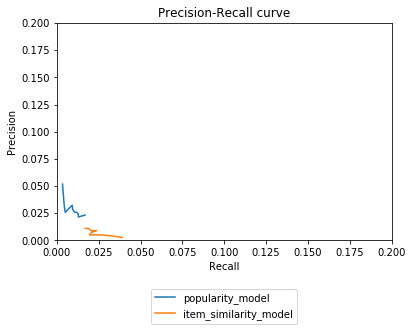

In [33]:
##### print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

### 8. Summarise your insights

From the Precision Recall curve, we can see that Popularity based model does not do relevant recommendations. There is a fall in Precision frequently.
The Collabrative recommendation does a steady relevant recommendation in the begining and tends to fall after few recommendation. But the fall is not that suddent to make irrelavent recommendation.

### 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [37]:
trainDF, tempDF = train_test_split(sample_df, test_size=0.2, random_state=1)
#creating a copy of tempDF as testDF
testDF = tempDF.copy()
#Assigning ratings of tempDF to nan
tempDF.ratings = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
tempDF.head()

,userId,productId,ratings
1476087,A2CIQEY05SPHTZ,B000W9UYL4,NaN
3043225,A370XYLIZCSK1Y,B00347L6I6,NaN
3337659,ANTN61S4L7WG9,B003FMVPFY,NaN
2560303,A2HPJKM7L4EOQB,B002DW97WK,NaN
1725957,A1MRPX3RM48T2I,B0015HYPOO,NaN


In [39]:
#Remove missing values in testDF
testDF = testDF.dropna()
testDF.head()

,userId,productId,ratings
1476087,A2CIQEY05SPHTZ,B000W9UYL4,2.0
3043225,A370XYLIZCSK1Y,B00347L6I6,5.0
3337659,ANTN61S4L7WG9,B003FMVPFY,5.0
2560303,A2HPJKM7L4EOQB,B002DW97WK,4.0
1725957,A1MRPX3RM48T2I,B0015HYPOO,4.0


In [41]:
#Creating ratings with trainDF and tempDF
ratings = pd.concat([trainDF, tempDF]).reset_index()

In [44]:
ratings.shape

(125871, 4)

Applying Matrix Factorization via Singular Value Decomposition¶

In [45]:
R_df = ratings.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
R_df.tail()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
AZBXKUH4AIW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZCE11PSTCH1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZMY6E8B52L2T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZNUHQSHZHSUE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZOK5STV85FBJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from scipy.sparse.linalg import svds

In [47]:
# The singular values - sigma with K = 5.
U, sigma, Vt = svds(R_df, k = 5)

In [48]:
#diag
sigma = np.diag(sigma)

In [51]:
sigma

array([[ 86.15135881,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,  88.88499251,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,  89.28798192,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,  99.80527754,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        148.41344865]])

In [49]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)

In [50]:
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.001341,0.0,0.004106,0.005752,0.000590,0.002527,0.002638,0.000235,0.008144,0.002143,...,0.000395,0.055904,0.004024,0.041704,0.0,0.008147,0.001396,0.119630,0.065704,0.018699
1,0.002063,0.0,0.005888,0.015223,0.000595,0.002231,0.013009,0.001540,0.005430,0.001884,...,0.000425,0.014243,0.002598,-0.010899,0.0,-0.000786,0.004046,-0.020849,-0.007816,0.002395
2,-0.000686,0.0,0.002077,0.013008,-0.000139,-0.001783,0.007072,0.002552,-0.001830,-0.001482,...,-0.000050,0.001463,-0.002642,-0.018384,0.0,-0.003092,0.000179,-0.026653,-0.011597,-0.007698
3,0.001894,0.0,0.002377,0.003217,0.000510,0.002501,0.004678,-0.000372,0.004418,0.002098,...,0.000301,0.003343,0.003150,-0.000522,0.0,0.000556,0.002677,-0.006864,-0.005356,0.004845
4,0.000455,0.0,0.001653,0.009631,0.000148,-0.000042,0.005630,0.001443,0.000842,-0.000026,...,0.000058,0.000572,-0.000349,-0.011240,0.0,-0.001621,0.001029,-0.014349,-0.010065,-0.002778


In [219]:
# return the products with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_movies_simple(predictions_df, userID, original_ratings_df, num_recommendations=5):
    # Get and sort the user's predictions
    someUser = ratings.index[ratings['userId'] == userID].tolist()
    user_row_number = someUser[0]
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    
    print ('User {0} has already rated {1} movies.'.format(userID, user_data.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    recommendations = (sample_df[~sample_df['productId'].isin(user_data['productId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left', left_on = 'productId', right_on = 'productId').
         rename(columns = {user_row_number: 'Predictions'}))
    
    uniquesProducts = recommendations.groupby(['productId']).agg({'Predictions': 'count'}).reset_index()
    
    recommendations = (uniquesProducts.sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    
    return recommendations, sorted_user_predictions, user_data

In [222]:
recommendations, sorted_user_predictions, user_data = recommend_movies_simple(preds_df, 'A3EP26M3QHINXT', ratings, 5)

User A3EP26M3QHINXT has already rated 50 movies.
Recommending the highest 5 predicted ratings movies not already rated.


In [223]:
recommendations

,productId
38971,B0088CJT4U
24812,B003ES5ZUU
38219,B007WTAJTO
38584,B00829TIEK
39306,B008DWCRQW
